In [ ]:
#Loading packages and libraries
!pip install scikit-surprise
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error,mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise.accuracy import mae, rmse


import pandas as pd
final_books = pd.read_csv('/content/drive/MyDrive/Books/70k_books.csv',encoding='latin-1',on_bad_lines='skip')

final_books.fillna('', inplace=True)
final_books.rename(columns={'authors': 'author','genres':'genre','description':'desc','Rating':'rating'}, inplace=True)




ratings = pd.read_csv('/content/drive/MyDrive/Books/ratings.csv', on_bad_lines='skip', encoding='latin1')
final_books.columns = final_books.columns.str.strip()
ratings.columns = ratings.columns.str.strip()
final_books.rename(columns={'book_Id': 'book_id'}, inplace=True)


# Print the column names again to confirm
print("\nBooks DataFrame columns after stripping spaces:")
print(final_books.columns)

print("\nRatings DataFrame columns after stripping spaces:")
print(ratings.columns)

# Display the first few rows of each dataset
print("Books Data:")
print(final_books.head())

print("\nRatings Data:")
print(ratings.head())












Books DataFrame columns after stripping spaces:
Index(['author', 'desc', 'genre', 'img', 'isbn', 'isbn13', 'link', 'rating',
       'title', 'book_id'],
      dtype='object')

Ratings DataFrame columns after stripping spaces:
Index(['book_id', 'user_id', 'rating'], dtype='object')
Books Data:
                                       author  \
0                                  Tom Lanoye   
1                                 Max Gunther   
2  Miguel Najdorf,Andrew Soltis,Yuri Averbakh   
3                               Adriano Zumbo   
4                              Adriaan Basson   

                                                desc  \
0  In de verdere lotgevallen van een Belgische vr...   
1  The 12 major and 16 minor Zurich Axioms contai...   
2  The Stuff of Legend A great tournament deserve...   
3  A whirlwind tour through the whimsical world o...   
4  This is the book President Jacob Zuma does not...   

                                               genre  \
0  Fiction,Litera

Explanatory Data Analysis


First few rows of the dataset:
                                       author  \
0                                  Tom Lanoye   
1                                 Max Gunther   
2  Miguel Najdorf,Andrew Soltis,Yuri Averbakh   
3                               Adriano Zumbo   
4                              Adriaan Basson   

                                                desc  \
0  In de verdere lotgevallen van een Belgische vr...   
1  The 12 major and 16 minor Zurich Axioms contai...   
2  The Stuff of Legend A great tournament deserve...   
3  A whirlwind tour through the whimsical world o...   
4  This is the book President Jacob Zuma does not...   

                                               genre  \
0  Fiction,Literature,European Literature,Dutch L...   
1  Economics,Finance,Business,Nonfiction,Economic...   
2                                        Games,Chess   
3  Food and Drink,Cookbooks,Food and Drink,Cookin...   
4  Southern Africa,South Africa,Nonfiction,Cultur...   



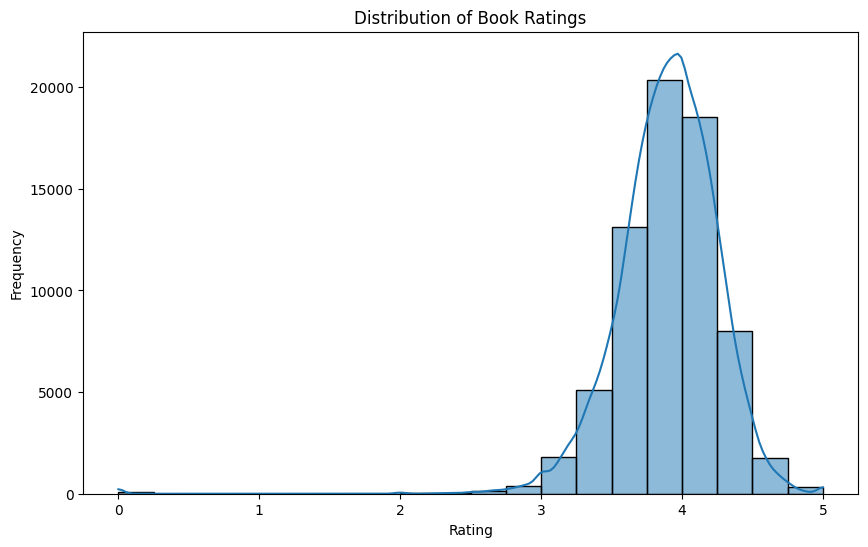

<ipython-input-8-8eef3a61ecf9>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=author_counts.index, x=author_counts.values, palette='viridis')


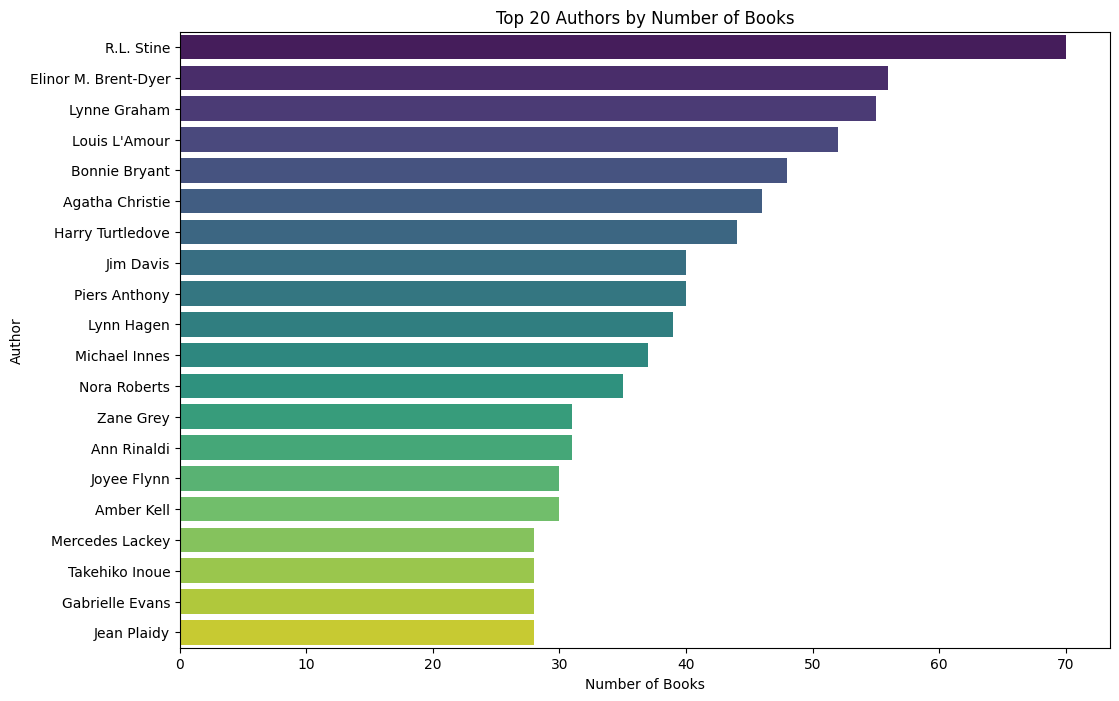

<ipython-input-8-8eef3a61ecf9>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='magma')


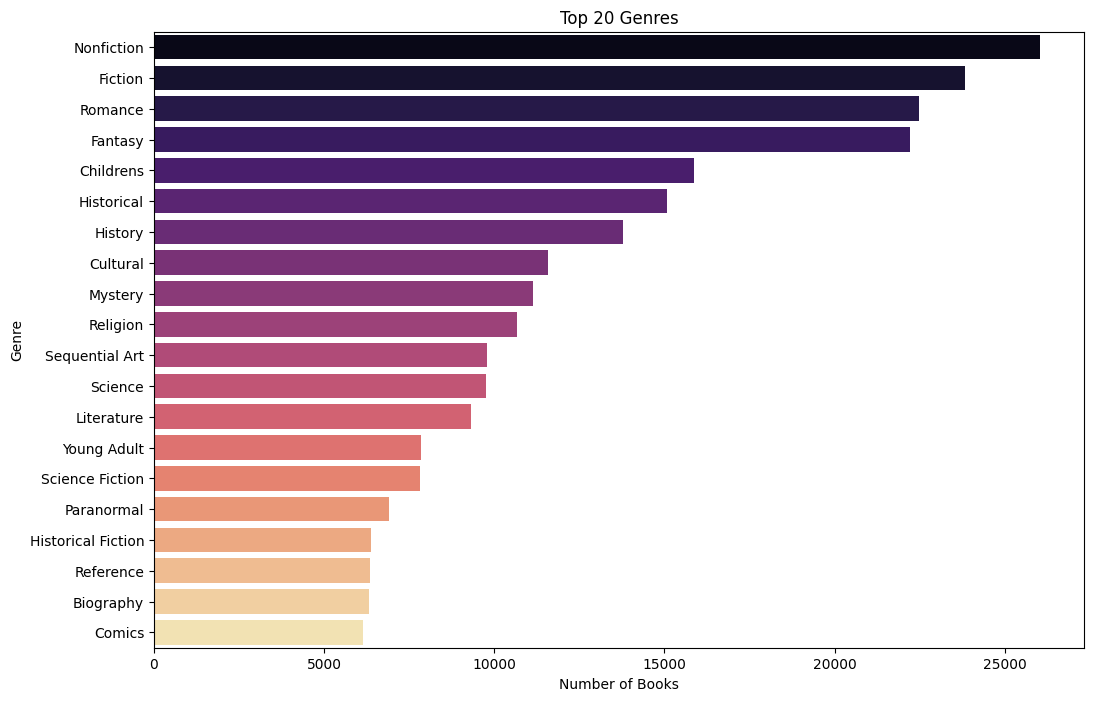

<ipython-input-8-8eef3a61ecf9>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_rating_by_genre.index, x=avg_rating_by_genre.values, palette='coolwarm')


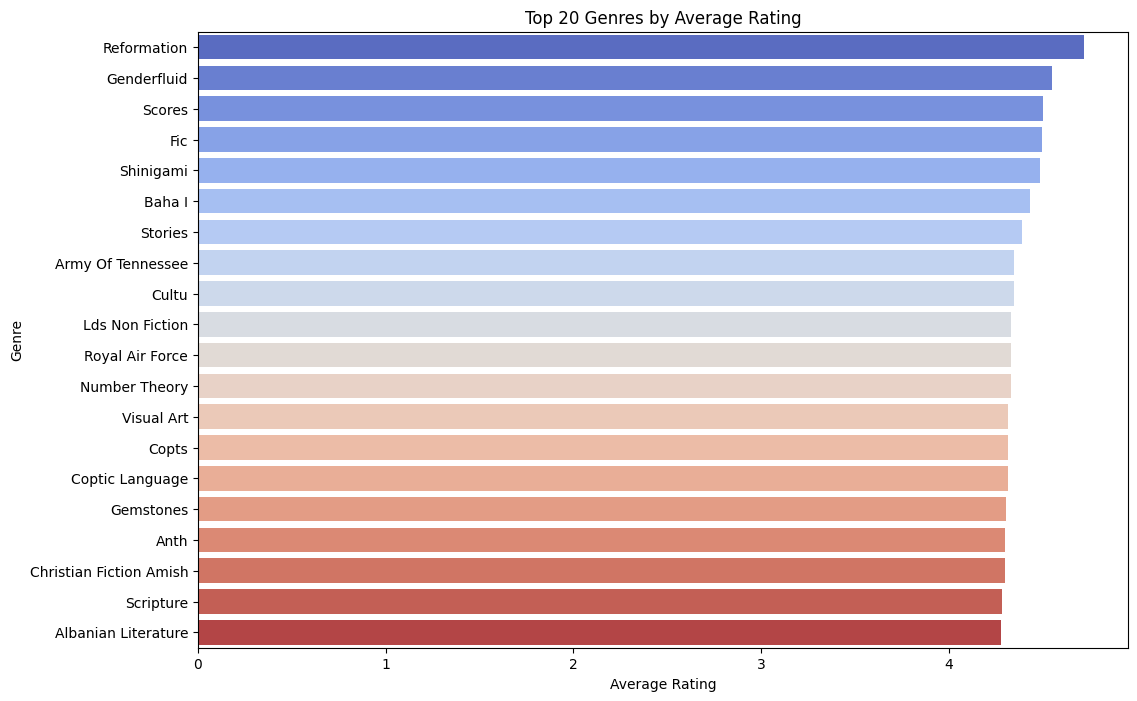

<ipython-input-8-8eef3a61ecf9>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_rating_by_author.index, x=avg_rating_by_author.values, palette='plasma')


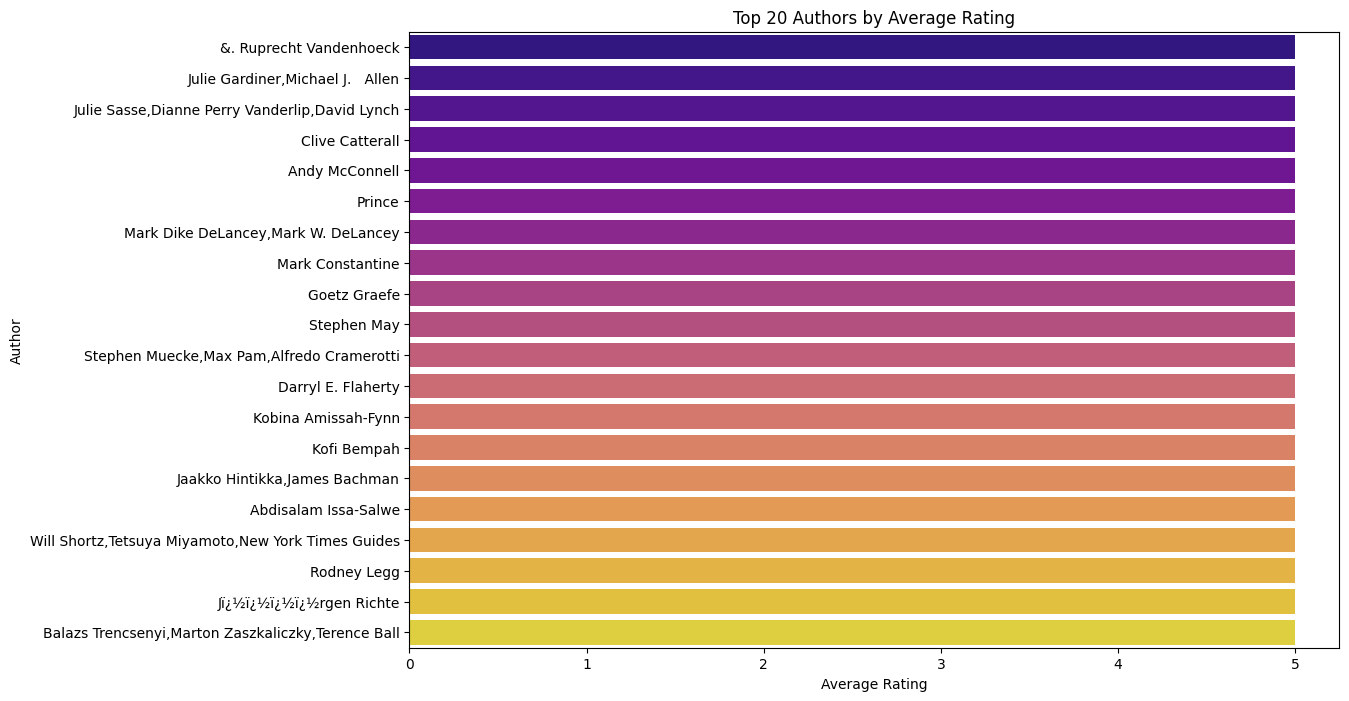

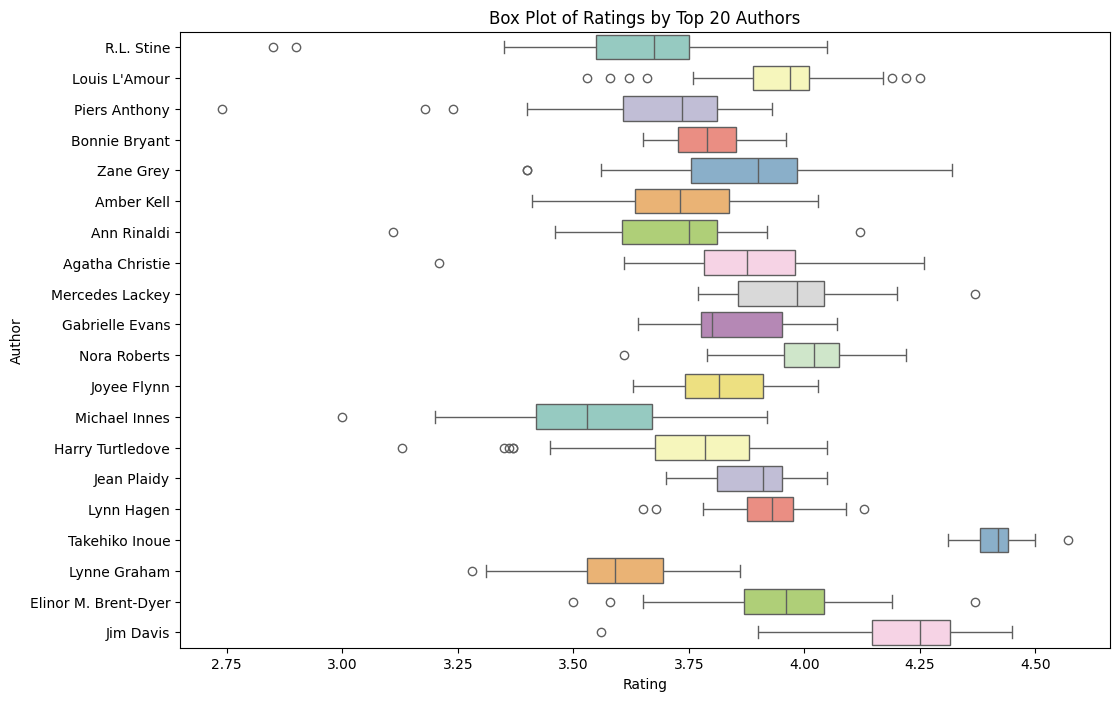

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Handle missing values (example: fill NaNs with empty string)
final_books.fillna('', inplace=True)
final_books.rename(columns={'book_Id': 'book_id'}, inplace=True)

# Inspect the first few rows of the dataset
print("First few rows of the dataset:")
print(final_books.head())

# Check for missing values
print("\nMissing values in each column:")
print(final_books.isnull().sum())

# Get basic statistics
print("\nBasic statistics of numerical columns:")
print(final_books.describe())

# Summary statistics for 'rating' column
rating_summary = final_books['rating'].describe()
print("\nSummary statistics for 'rating' column:")
print(rating_summary)

# Summary statistics for 'rating' by author
rating_by_author_summary = final_books.groupby('author')['rating'].describe().head(20)
print("\nSummary statistics for 'rating' by author (top 20 authors):")
print(rating_by_author_summary)

# Split the genres by comma and explode into separate rows
genres_exploded = final_books.assign(genre=final_books['genre'].str.split(',')).explode('genre')

# Summary statistics for 'rating' by genre
rating_by_genre_summary = genres_exploded.groupby('genre')['rating'].describe().head(20)
print("\nSummary statistics for 'rating' by genre (top 20 genres):")
print(rating_by_genre_summary)

# Plot the distribution of book ratings
plt.figure(figsize=(10, 6))
sns.histplot(final_books['rating'], bins=20, kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Count the number of books per author
author_counts = final_books['author'].value_counts().head(20)

# Plot the top 20 authors by number of books
plt.figure(figsize=(12, 8))
sns.barplot(y=author_counts.index, x=author_counts.values, palette='viridis')
plt.title('Top 20 Authors by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()

# Count the number of occurrences of each genre
genre_counts = genres_exploded['genre'].value_counts().head(20)

# Plot the top 20 genres
plt.figure(figsize=(12, 8))
sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='magma')
plt.title('Top 20 Genres')
plt.xlabel('Number of Books')
plt.ylabel('Genre')
plt.show()

# Calculate the average rating for each genre
avg_rating_by_genre = genres_exploded.groupby('genre')['rating'].mean().sort_values(ascending=False).head(20)

# Plot the average rating by genre
plt.figure(figsize=(12, 8))
sns.barplot(y=avg_rating_by_genre.index, x=avg_rating_by_genre.values, palette='coolwarm')
plt.title('Top 20 Genres by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

# Calculate the average rating for each author
avg_rating_by_author = final_books.groupby('author')['rating'].mean().sort_values(ascending=False).head(20)

# Plot the average rating by author
plt.figure(figsize=(12, 8))
sns.barplot(y=avg_rating_by_author.index, x=avg_rating_by_author.values, palette='plasma')
plt.title('Top 20 Authors by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Author')
plt.show()

# Plot a box plot of ratings by author (top 20 authors by number of books)
top_authors = final_books['author'].value_counts().head(20).index
top_authors_books = final_books[final_books['author'].isin(top_authors)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='rating', y='author', hue='author', data=top_authors_books, palette='Set3', dodge=False)
plt.title('Box Plot of Ratings by Top 20 Authors')
plt.xlabel('Rating')
plt.ylabel('Author')
plt.legend([],[], frameon=False)
plt.show()


In [ ]:
# Content-Based Filtering
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer



final_books['combined_features'] = final_books['title'] +  ' ' + final_books['genre'] + ' ' + final_books['author'].fillna('')+ ' ' + final_books['desc']

# Split the data to create a test set (20%)
test_data = final_books.sample(frac=0.2, random_state=42)
train_data = final_books.drop(test_data.index)

# Initialize CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english', max_features=5000)

# Fit and transform the combined features
count_matrix = count_vectorizer.fit_transform(final_books['combined_features'])

# Initialize TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Fit and transform the count matrix to get the TF-IDF matrix
tfidf_matrix = tfidf_transformer.fit_transform(count_matrix)

def compute_cosine_similarity(tfidf_matrix, idx, top_n=10):
    # Compute the cosine similarity of the book with index idx to all other books
    cosine_similarities = linear_kernel(tfidf_matrix[idx], tfidf_matrix).flatten()

    # Get the top_n most similar books
    similar_indices = cosine_similarities.argsort()[-top_n-1:-1][::-1]
    similar_scores = cosine_similarities[similar_indices]

    return similar_indices, similar_scores

# Example of getting recommendations for a sample book
sample_idx = final_books[final_books['book_id'] == 3868].index[0]
similar_indices, similar_scores = compute_cosine_similarity(tfidf_matrix, sample_idx)

# Get the recommended books
recommended_books = final_books.iloc[similar_indices]
def get_recommendations(book_id, top_n=10):
    # Get the index of the book that matches the title
    idx = final_books[final_books['book_id'] == book_id].index[0]
    # Compute the cosine similarity and get the top_n most similar books
    similar_indices, similar_scores = compute_cosine_similarity(tfidf_matrix, idx, top_n)

    # Return the top_n most similar books
    return final_books.iloc[similar_indices]

# Get recommendations for a sample book
sample_recommendations = get_recommendations(3868)
print("Recommended books: ")
print(sample_recommendations[['book_id','title']])

Recommended books: 
       book_id                                       title
49445    49446                                    Gantz/35
49446    49447                                    Gantz/31
3219      3220                           Walkin' Butterfly
49448    49449                                    Gantz/28
3873      3874                           Vagabond, tomo 16
3874      3875                                Vagabond #17
46074    46075                               Homunculus 10
27711    27712                     Saiyuki Reload Volume 1
27713    27714  Saiyuki Reload Vol. 7 (Saiyuki Reload, #7)
3868      3869                         Vagabond, Volume 20


In [ ]:
!pip install surprise
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load data
# Assuming final_books is your dataframe and user_ratings is a dataframe with columns: user_id, book_id, rating
final_books = pd.read_csv('/content/drive/MyDrive/Books/70k_books.csv', encoding='latin-1', on_bad_lines='skip')
ratings = pd.read_csv('ratings (1).csv', encoding='latin-1')


# Prepare the data for content-based filtering
final_books['combined_features'] = final_books['genre'] + ' ' + final_books['title'].fillna('')

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(final_books['combined_features'])

# Prepare the data for collaborative filtering using Surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['user_id', 'book_id', 'rating']], reader)

# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train the collaborative filtering model (SVD)
svd = SVD()
svd.fit(trainset)

# Function to get content-based recommendations
def get_content_based_recommendations(user_id, tfidf_matrix, final_books, top_n=10):
    user_rated_books = ratings[ratings['user_id'] == user_id]['book_id'].tolist()
    all_similar_books = []
    for book_id in user_rated_books:
        # Handle the case where book_id might not be found
        idx = final_books[final_books['book_id'] == book_id].index
        if idx.size > 0:  # Check if the index is not empty
            idx = idx[0]
            cosine_similarities = linear_kernel(tfidf_matrix[idx], tfidf_matrix).flatten()
            similar_indices = cosine_similarities.argsort()[-top_n-1:-1][::-1]
            all_similar_books.extend(similar_indices)
    recommended_indices = list(set(all_similar_books))
    return final_books.iloc[recommended_indices]['book_id'].tolist()

# Function to get collaborative filtering recommendations
def get_collaborative_recommendations(user_id, model, trainset, top_n=10):
    user_rated_books = [book_id for (book_id, _) in trainset.ur[trainset.to_inner_uid(user_id)]]
    predictions = [model.predict(user_id, book_id) for book_id in final_books['book_id'].unique() if book_id not in user_rated_books]
    predictions.sort(key=lambda x: x.est, reverse=True)
    return [pred.iid for pred in predictions[:top_n]]

# Function to get dynamic weights based on user interaction
def content_weight_function(user_id, ratings_df):
    rated_count = ratings_df[ratings_df['user_id'] == user_id].shape[0]
    if rated_count < 10:
        return 0.7  # Higher weight to content-based recommendations

    elif rated_count < 50:
        return 0.5  # Equal weight to both
    else:
        return 0.3  # Higher weight to collaborative filtering

def collaborative_weight_function(user_id, ratings_df):
    return 1 - content_weight_function(user_id, ratings_df)

# Function to get weighted ensemble recommendations
def get_weighted_ensemble_recommendations(user_id, ratings_df, tfidf_matrix, final_books, svd, trainset, top_n=10):
    content_weight = content_weight_function(user_id, ratings_df)
    collaborative_weight = collaborative_weight_function(user_id, ratings_df)

    content_recommendations = get_content_based_recommendations(user_id, tfidf_matrix, final_books)
    collaborative_recommendations = get_collaborative_recommendations(user_id, svd, trainset)

    user_rated_books = ratings_df[ratings_df['user_id'] == user_id]['book_id'].tolist()

    all_recommendations = {}

    for book_id in content_recommendations:
        if book_id not in user_rated_books:
            if book_id in all_recommendations:
                all_recommendations[book_id] += content_weight
            else:
                all_recommendations[book_id] = content_weight

    for book_id in collaborative_recommendations:
        if book_id not in user_rated_books:
            if book_id in all_recommendations:
                all_recommendations[book_id] += collaborative_weight
            else:
                all_recommendations[book_id] = collaborative_weight

    sorted_recommendations = sorted(all_recommendations.items(), key=lambda x: x[1], reverse=True)
    top_recommendations = [book_id for book_id, score in sorted_recommendations[:top_n]]
    return final_books[final_books['book_id'].isin(top_recommendations)]

# Example: Get top 10 recommendations for user with user_id = 1
user_id = 1
recommendations = get_weighted_ensemble_recommendations(user_id, ratings, tfidf_matrix, final_books, svd, trainset, top_n=10)
print("Weighted Ensemble Recommended books for user {}: ".format(user_id))
print(recommendations[['book_id', 'title']])


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Weighted Ensemble Recommended books for user 1: 
       book_id                  title
27          28   Zombie-Loan, Vol. 13
28          29   Zombie-Loan, Vol. 11
514        515  Yaoi Hentai: Volume 2
537        538      xxxHolic, Vol. 18
538        539      xxxHolic, Vol. 17
539        540      xxxHolic, Vol. 11
1545      1546               Wildwood
18437    18438  The Cybernetic Walrus
65030    65031     Arcade Catastrophe
65036    65037                Arachn

RMSE: 0.8837
MAE:  0.6789
RMSE: 0.8836756098157924
MAE: 0.6789251849515952
Precision at 10: 0.8025718961889179
Recall at 10: 0.5310112014081387
F1 Score at 10: 0.6391422740429099
NDCG at 10: 0.9550878397789118


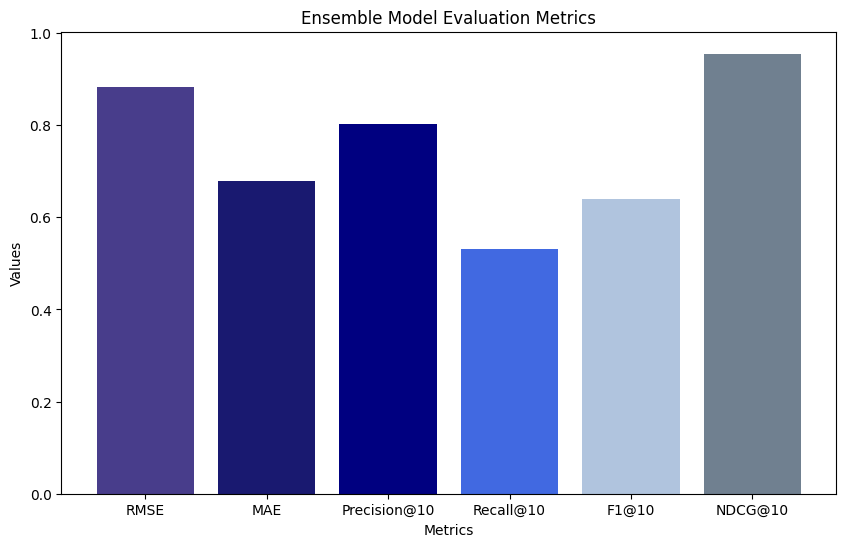

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from collections import defaultdict
from surprise import accuracy
from surprise.model_selection import KFold
from surprise import SVD
from surprise import Dataset
from surprise import Reader
predictions = svd.test(testset)
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)


# Precision at K, Recall at K, F1 Score at K, NDCG
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold)) for (est, true_r) in user_ratings[:k])
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    precision_at_k = sum(prec for prec in precisions.values()) / len(precisions)
    recall_at_k = sum(rec for rec in recalls.values()) / len(recalls)
    f1_at_k = 2 * precision_at_k * recall_at_k / (precision_at_k + recall_at_k) if (precision_at_k + recall_at_k) != 0 else 0

    return precision_at_k, recall_at_k, f1_at_k

# Calculate precision, recall, and F1 at K for collaborative filtering
precision_at_k, recall_at_k, f1_at_k = precision_recall_at_k(predictions, k=10)

# Function to calculate NDCG
def ndcg_at_k(predictions, k=10):
    def dcg(relevance_scores):
        return sum([rel / np.log2(idx + 2) for idx, rel in enumerate(relevance_scores)])

    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    ndcgs = []
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        relevance_scores = [true_r for _, true_r in user_ratings[:k]]
        ideal_relevance_scores = sorted(relevance_scores, reverse=True)

        dcg_val = dcg(relevance_scores)
        idcg_val = dcg(ideal_relevance_scores)

        ndcgs.append(dcg_val / idcg_val if idcg_val != 0 else 0)

    return np.mean(ndcgs)

# Calculate NDCG for collaborative filtering
ndcg_at_k_value = ndcg_at_k(predictions, k=10)

# Print the evaluation results
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"Precision at 10: {precision_at_k}")
print(f"Recall at 10: {recall_at_k}")
print(f"F1 Score at 10: {f1_at_k}")
print(f"NDCG at 10: {ndcg_at_k_value}")

# Plotting the results
metrics = ['RMSE','MAE', 'Precision@10', 'Recall@10', 'F1@10', 'NDCG@10']
values = [rmse,mae ,precision_at_k, recall_at_k, f1_at_k, ndcg_at_k_value]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['darkslateblue', 'midnightblue', 'navy','royalblue', 'lightsteelblue', 'slategrey'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Ensemble Model Evaluation Metrics')
plt.show()

def evaluate_hybrid_model(user_id, ratings, tfidf_matrix, final_books, svd, trainset, top_n=10):
    # Get recommendations using the weighted ensemble function
    recommendations = get_weighted_ensemble_recommendations(user_id, ratings, tfidf_matrix, final_books, svd, trainset, top_n)

    # Extract the recommended book IDs
    recommended_book_ids = recommendations['book_id'].tolist()

    # Extract the actual books the user has interacted with
    user_actual_books = ratings[ratings['user_id'] == user_id]['book_id'].tolist()

    # Calculate precision@k
    precision_at_k = len(set(recommended_book_ids) & set(user_actual_books)) / len(recommended_book_ids) if recommended_book_ids else 0

    # Calculate recall@k
    recall_at_k = len(set(recommended_book_ids) & set(user_actual_books)) / len(user_actual_books) if user_actual_books else 0

    # Calculate F1 score@k
    f1_at_k = 2 * precision_at_k * recall_at_k / (precision_at_k + recall_at_k) if (precision_at_k + recall_at_k) != 0 else 0

    # Debugging outputs
    print(f"User ID: {user_id}")
    print(f"Recommended Book IDs: {recommended_book_ids}")
    print(f"Actual Book IDs: {user_actual_books}")
    print(f"Precision@{top_n}: {precision_at_k}")
    print(f"Recall@{top_n}: {recall_at_k}")
    print(f"F1@{top_n}: {f1_at_k}")

    return precision_at_k, recall_at_k, f1_at_k



